In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("weight-height.csv")
df.sample(7)

,Gender,Height,Weight
6240,Female,62.952322,134.733746
1728,Male,68.679035,177.521933
6496,Female,61.924197,125.821692
1721,Male,71.196587,191.683842
7923,Female,69.952467,194.240362
1128,Male,69.294168,189.463364
8645,Female,61.789419,136.646282


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


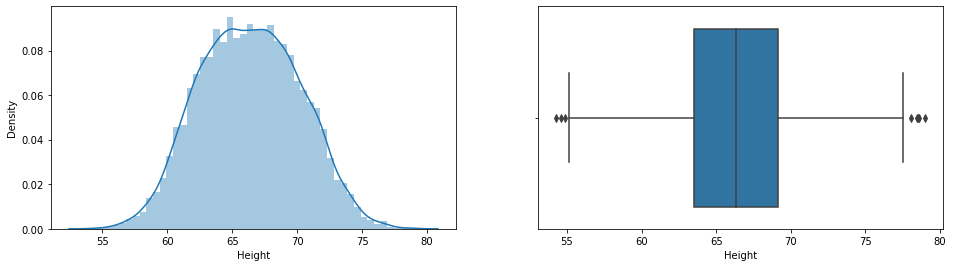

In [5]:
#comparing

plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.show()

In [6]:
upper_limit = df['Height'].quantile(0.95)
lower_limit = df['Height'].quantile(0.05)

In [7]:
print("lower_limit  is :",lower_limit)
print("upper_limit  is :",upper_limit)

lower_limit  is : 60.24622082610544
upper_limit  is : 72.61710606642384


In [8]:
#trimming

new_df = df[(df['Height'] <=72.61) & (df['Height'] >=60.24)]#right upper limit 
# left lower limit

In [9]:
new_df.shape

(8998, 3)

In [10]:
print("\033[1m" + "\n\n  new values : \n\n" + "\033[0m",new_df['Height'].describe())
print("\033[1m" + "\n\n  old values : \n\n" + "\033[0m",df['Height'].describe())



  new values : 

 count    8998.000000
mean       66.349453
std         3.164430
min        60.243359
25%        63.801762
50%        66.316559
75%        68.894251
max        72.607697
Name: Height, dtype: float64


  old values : 

 count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64


C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

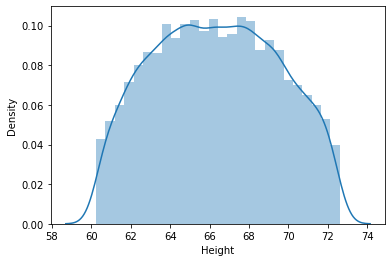

In [11]:
sns.distplot(new_df['Height'])

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

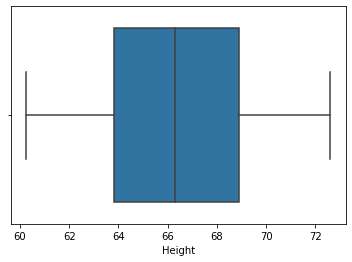

In [12]:
sns.boxplot(new_df['Height'])

In [13]:

# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [14]:
df.shape

(10000, 3)

In [15]:
df['Height'].describe()

count    10000.000000
mean        66.362638
std          3.584055
min         60.246221
25%         63.505620
50%         66.318070
75%         69.174262
max         72.617106
Name: Height, dtype: float64

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

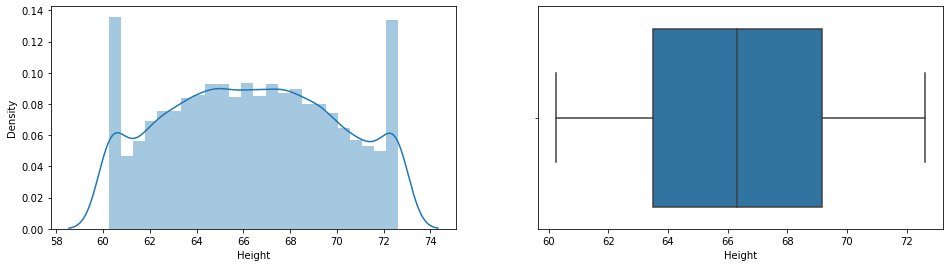

In [16]:
#comparing

plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])